# 19002065
# Ariel Chitay

# Red neuronal 1, MLP

Acontinuación encontrará una red capaz de poder aprender a sumar, restar, multiplicar y dividir.

Por efectos de procesamiento, se han dejado un learning rate bajo y tres capas ocultas, para demostrar la eficiencia de cada prueba, se dejarán ciertas gráficas al final del programa para que se observe con la variación del learning rate se mejorará.

In [ ]:
import pandas as pd
import numpy as np

%matplotlib notebook

Creamos el dataset de forma aleatoria para que aprenda a hacer las operaciones aritmeticas basicas. Donde cada 1 va a representar que operacion se activara para utilizar.

In [2]:
import random
def get_random_ops(rows=100):
    data = []
    for i in range(0, rows):
        a = random.randint(1,100)
        b = random.randint(1,100)
        suma, resta, multi, divi = random.choice([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
        ])
        
        if suma == 1: y = a+b
        if resta == 1: y = a-b
        if multi == 1: y = a*b
        if divi == 1: y = a/b
            
        data.append({
            "a":a,
            "b":b,
            "suma": suma,
            "resta": resta,
            "multi": multi,
            "divi": divi,
            "y": round(y, 2)
        })
    return data

Mostramos el dataset que usaremos para entrenar nuestro modelo.

In [30]:
data = pd.DataFrame(get_random_ops(100000))
data[["a", "b", "suma", "resta", "multi", "divi", "y"]].head()

,a,b,suma,resta,multi,divi,y
0,85,10,1,0,0,0,95.00
1,83,4,0,0,0,1,20.75
2,96,5,0,0,0,1,19.20
3,39,100,0,0,1,0,3900.00
4,11,19,0,0,0,1,0.58


Iniciamos a entrenar el modelo 

In [71]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    data[["a", "b", "suma", "resta", "multi", "divi"]], data["y"], 
    test_size=0.30, random_state=42
)

El bloque de codigo acontinuacion, entrenara mejor a la maquina entre mas iteraciones tenga. Esto sera demostrado a traves de las graficas en la parte final del notebook.

In [65]:
model = MLPRegressor(
    max_iter=10000,
    hidden_layer_sizes=(100,100,100),
    learning_rate_init=0.0001,
)
model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Demostrando la capacidad del algoritmo MLP para entrenar, como nota recordar que el 1, representa que operacion se esta realizando.

In [66]:
print(X_test.iloc[3])
print(y_test.iloc[3])
print(model.predict([X_test.iloc[3]]))

a        63
b        91
suma      0
resta     0
multi     1
divi      0
Name: 660, dtype: int64
5733.0
[5428.25504395]


In [67]:
predict = model.predict(X_test)
print("Predict: %s" % list(predict[:100]))

Predict: [29.15265651932708, 1337.9715591055672, 26.190844247555987, 5428.255043945768, 65.13776369810377, 45.62739142356945, -68.34701766000894, -125.08671892123435, 34.25012152558908, -84.30756477321545, 36.5979110950754, 4.038859465633564, 90.62858069483333, 45.44992468675015, 75.54463627285308, 108.60051343952067, 89.7685600092909, 894.9224384188101, -46.30462859058612, 2389.4423319052657, -69.71637736890273, 1187.6847413729827, 165.83349784150354, 88.8060803021559, 2003.9588050258499, 129.33767183620756, -39.278308263692665, 85.52938630731946, 10.917244662157444, -79.21726015662048, 33.3808050347148, 2.3527029763933602, 200.31205982971147, 49.472577523823404, 112.36455537842487, 281.6485525089307, 49.973839280151964, -87.84354760844161, 85.05161979689382, 6282.880976472914, 5043.691100611852, 54.150291648306506, 6380.75882952047, 2580.1907431710856, 4340.439135031046, 0.9689786028366999, 45.61203332800946, 0.23489784666450964, -84.43596874128659, 726.7060787653661, -14.67546072998

In [68]:
data_check = pd.DataFrame(predict, columns=["predict"])
data_check["y"]=list(y_test)
data_check.set_index(["y"], drop=False, inplace=True)
data_check.sort_values(['y'],axis=0,ascending=True,inplace=True)

C:\Users\Ariel Chitay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'y' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


A continuacion se daran graficos para demostrar que entre mas iteraciones y modificando las capas ocultas, se tendra una mejor precision.

Por efectos de procesador, se dejaran las iteraciones y las capas ocultas mostradas anteriormente.

<IPython.core.display.Javascript object>


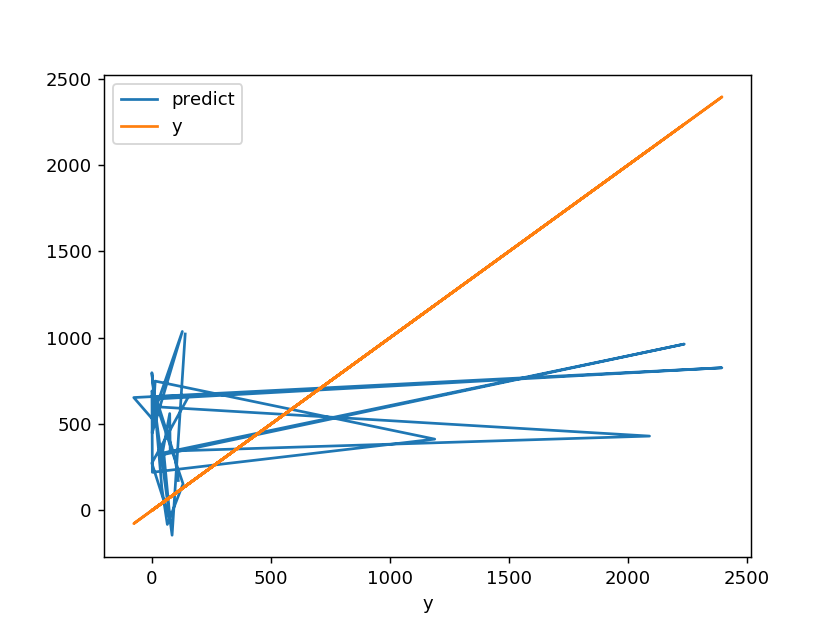

In [19]:
# Paso 2
data_check.plot()

<IPython.core.display.Javascript object>


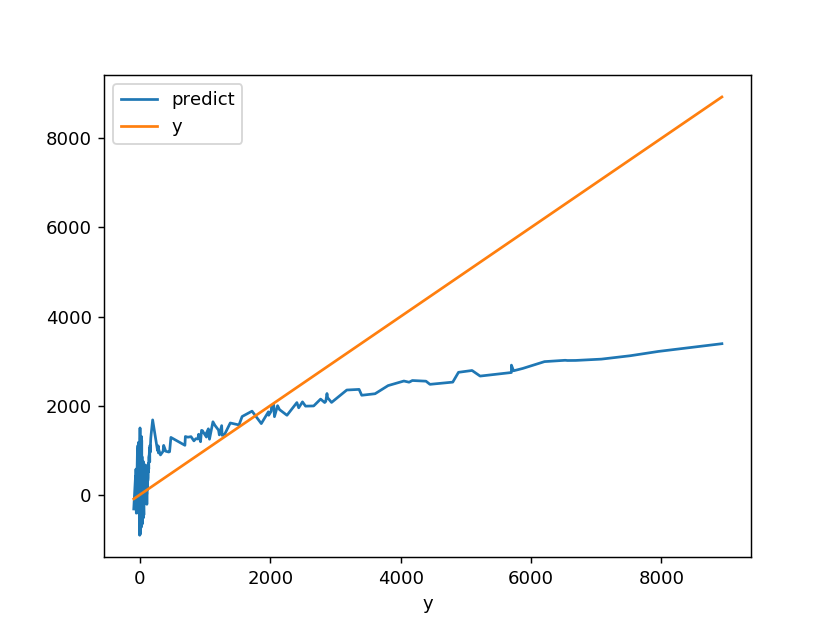

In [29]:
# Paso 3
data_check.plot()

<IPython.core.display.Javascript object>


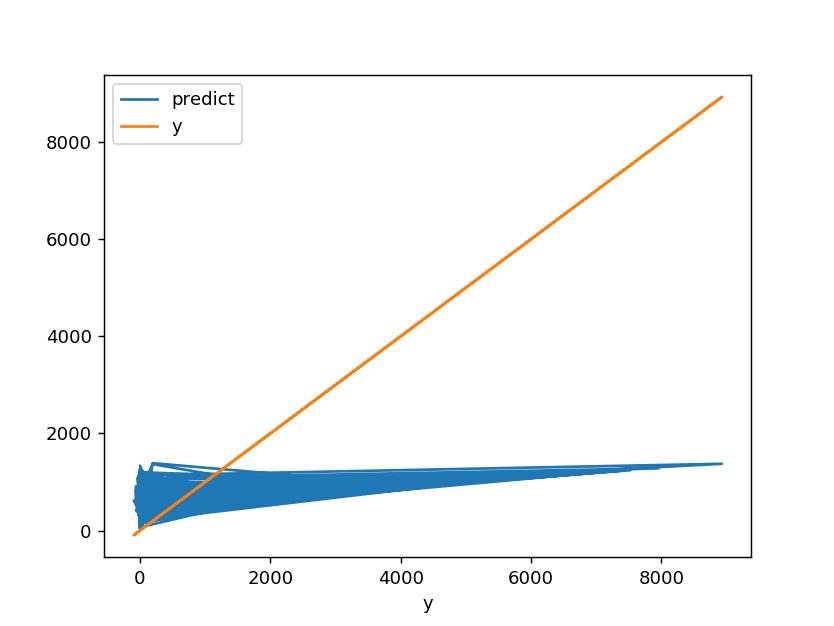

In [40]:
# Paso 2
data_check.plot()

<IPython.core.display.Javascript object>


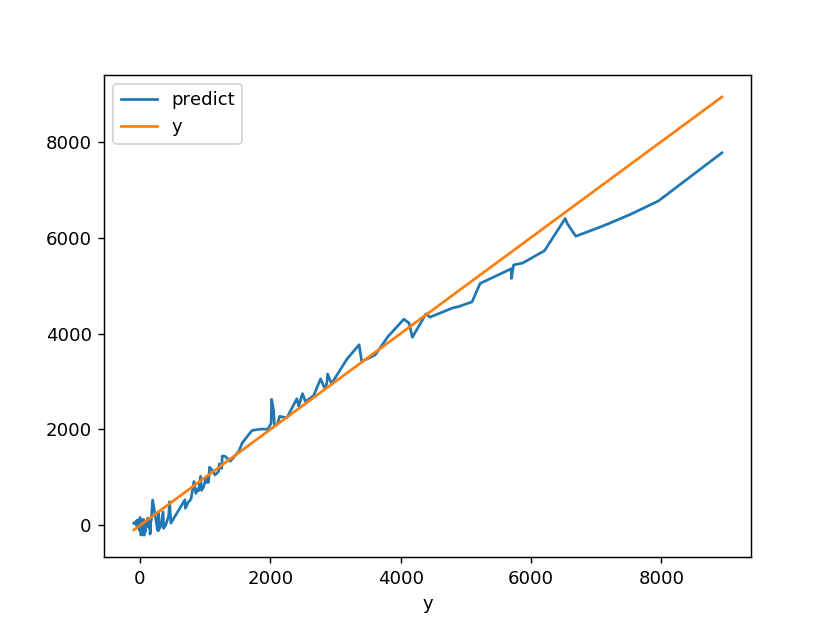

In [70]:
# Paso 1
data_check.plot()